In [2]:
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [3]:
df = pd.read_csv('BA_dataset.csv')

In [4]:
anual_rate =  0.07738 

monthly_rate =  ((1 + anual_rate) ** (1/12)) - 1

In [5]:
df#['monthly_income'].sum()

,Unnamed: 0,purpose,terms,interest_rate,risk_type_original,principal_amount,churn,company_id,disbursed_date,age,monthly_income
0,11130,Payment of Utilities,1,0.00,F,3700.000000,1,576,3,44.0,16600.0
1,4749,Home Repairs and Improvement,1,0.00,F,2000.000000,1,119,1,27.0,10920.0
2,7058,Home Repairs and Improvement,1,0.00,F,4700.000000,0,576,3,28.0,23400.0
3,11132,Home Repairs and Improvement,1,0.00,F,4600.000000,1,576,2,25.0,10000.0
4,5492,Hospitalization In-patient Expenses,1,0.00,F,5200.000000,0,967,1,33.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
995,281,Medical Outpatient Expenses,36,11.22,D,50000.000000,0,198,1,30.0,25000.0
996,9780,Home Repairs and Improvement,36,17.30,A,123600.000001,0,905,1,36.0,13694.0
997,10419,Home Repairs and Improvement,36,17.30,B,90000.000000,0,318,2,23.0,16000.0
998,10411,Purchase of Household Appliances & Furniture,36,64.01,NaN,50000.000000,0,897,3,30.0,8000.0


In [6]:
df['interest_rate'] = df['interest_rate'] / 100


In [7]:
# As we understand it is being charged on a monthly basis, we calculate the monthly interest rate and calculate the amount we 
# get per month

df['monthly_interest_rate'] =  ((1 + df['interest_rate']) ** (1/12)) - 1

In [8]:
#Cf= C (1+i)^n

df['principal_amount_final'] = (df['principal_amount']) * ((1 + df['monthly_interest_rate'])**df['disbursed_date'])

In [9]:
#First thing we need to calculate is the NPV (Net present value) of each loan. We assume a current interest rate of 0%

In [10]:
df['NPV'] = df['principal_amount_final'] / (1 + monthly_rate ) ** df['disbursed_date']

In [11]:
# we put the NPV of churned customers to 0, as they are churned

df_churned = df[df.churn == 1]

df_churned['NPV'] = df_churned['principal_amount'] * (1 + monthly_rate)

df_no_churned = df[df.churn == 0]

df = df_churned.append(df_no_churned)

del(df_churned, df_no_churned)

C:\Users\CALVIC~1\AppData\Local\Temp/ipykernel_14624/4219748271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned['NPV'] = df_churned['principal_amount'] * (1 + monthly_rate)


In [12]:
df['profit'] = df['NPV'] - df['principal_amount']

In [13]:
df.to_csv('calculated.csv', sep = ";")

In [14]:
# from here, we apply the random forest algorithm to classify the customers if they are going to be churn or not. 

In [15]:
df.columns

Index(['Unnamed: 0', 'purpose', 'terms', 'interest_rate', 'risk_type_original',
       'principal_amount', 'churn', 'company_id', 'disbursed_date', 'age',
       'monthly_income', 'monthly_interest_rate', 'principal_amount_final',
       'NPV', 'profit'],
      dtype='object')

In [16]:

# define example
data = df['purpose']
values = np.array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

df['column_merge'] = df.index

onehot_encoded = pd.DataFrame(onehot_encoded)

onehot_encoded['column_merge'] = onehot_encoded.index

onehot_encoded = onehot_encoded.rename(columns={0: 'purpose_0', 1: 'purpose_1', 2: 'purpose_2', 3:'purpose_3',
                               4: 'purpose_4', 5: 'purpose_5', 6: 'purpose_6', 7: 'purpose_7', 8: 'purpose_8', 9: 'purpose_9',
                               10: 'purpose_10', 11: 'purpose_11', 12: 'purpose_12', 13: 'purpose_13', 14: 'purpose_14',
                               15: 'purpose_15', 16: 'purpose_16', 17: 'purpose_17'})

df = pd.merge(df, onehot_encoded, how = 'inner',  on=['column_merge'])

del(data, values, onehot_encoder, integer_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# define example
data = df['risk_type_original']
values = np.array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

df['column_merge'] = df.index

onehot_encoded = pd.DataFrame(onehot_encoded)

onehot_encoded['column_merge'] = onehot_encoded.index

onehot_encoded = onehot_encoded.rename(columns={0: 'risk_type_original_0', 1: 'risk_type_original_1', 2: 'risk_type_original_2', 3:'risk_type_original_3',
                               4: 'risk_type_original_4', 5: 'risk_type_original_5', 6: 'risk_type_original_6', 7: 'risk_type_original_7', 8: 'risk_type_original_8', 9: 'risk_type_original_9',
                               10: 'risk_type_original_10', 11: 'risk_type_original_11', 12: 'risk_type_original_12', 13: 'risk_type_original_13', 14: 'risk_type_original_14',
                               15: 'risk_type_original_15', 16: 'risk_type_original_16', 17: 'risk_type_original_17'})

df = pd.merge(df, onehot_encoded, how = 'inner',  on=['column_merge'])

del(data, values, onehot_encoder, integer_encoded)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
df.columns

Index(['Unnamed: 0', 'purpose', 'terms', 'interest_rate', 'risk_type_original',
       'principal_amount', 'churn', 'company_id', 'disbursed_date', 'age',
       'monthly_income', 'monthly_interest_rate', 'principal_amount_final',
       'NPV', 'profit', 'column_merge', 'purpose_0', 'purpose_1', 'purpose_2',
       'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'purpose_7',
       'purpose_8', 'purpose_9', 'purpose_10', 'purpose_11', 'purpose_12',
       'purpose_13', 'purpose_14', 'purpose_15', 'purpose_16',
       'risk_type_original_0', 'risk_type_original_1', 'risk_type_original_2',
       'risk_type_original_3', 'risk_type_original_4', 'risk_type_original_5',
       'risk_type_original_6', 'risk_type_original_7', 'risk_type_original_8'],
      dtype='object')

In [19]:
df = df.dropna()

In [20]:
X=df[['interest_rate','principal_amount', 'disbursed_date', 'age', 'monthly_income', 'purpose_0', 'purpose_1', 'purpose_2',
       'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'purpose_7',
       'purpose_8', 'purpose_9', 'purpose_10', 'purpose_11', 'purpose_12',
       'purpose_13', 'purpose_14', 'purpose_15', 'purpose_16',
       'risk_type_original_0', 'risk_type_original_1', 'risk_type_original_2',
       'risk_type_original_3', 'risk_type_original_4', 'risk_type_original_5',
       'risk_type_original_6', 'risk_type_original_7', 'risk_type_original_8']] 
#PROMO_boxes, lo pongo? mejora la predicción, pero si una clienta no ha tenido nunca promos, aprende que es 0
y=df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50, random_state=1)


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [22]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Accuracy: 0.8497652582159625
Mean Absolute Error: 0.15023474178403756
Mean Squared Error: 0.15023474178403756


In [23]:
# 'interest_rate','principal_amount',

In [27]:
feature_columns = df[['interest_rate','principal_amount', 'disbursed_date', 'age', 'monthly_income', 'purpose_0', 'purpose_1', 'purpose_2',
       'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6', 'purpose_7',
       'purpose_8', 'purpose_9', 'purpose_10', 'purpose_11', 'purpose_12',
       'purpose_13', 'purpose_14', 'purpose_15', 'purpose_16',
       'risk_type_original_0', 'risk_type_original_1', 'risk_type_original_2',
       'risk_type_original_3', 'risk_type_original_4', 'risk_type_original_5',
       'risk_type_original_6', 'risk_type_original_7', 'risk_type_original_8']] .columns

In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=
                        feature_columns ).sort_values(ascending=False)

feature_imp

principal_amount        0.195347
monthly_income          0.182275
age                     0.162076
interest_rate           0.139054
disbursed_date          0.050308
purpose_5               0.025303
purpose_7               0.024756
risk_type_original_2    0.023517
risk_type_original_7    0.022741
purpose_2               0.017750
risk_type_original_3    0.016251
risk_type_original_0    0.016113
purpose_13              0.016025
purpose_9               0.014028
purpose_16              0.013449
purpose_14              0.012096
risk_type_original_4    0.011988
risk_type_original_6    0.010732
purpose_15              0.010453
risk_type_original_5    0.009836
purpose_1               0.007312
purpose_6               0.007034
risk_type_original_1    0.006185
purpose_4               0.001847
purpose_12              0.001451
purpose_11              0.000914
purpose_8               0.000547
purpose_3               0.000330
purpose_10              0.000283
purpose_0               0.000000
risk_type_

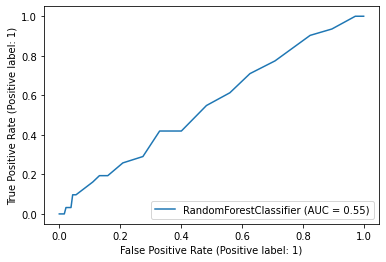

In [29]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(clf, X_test, y_test)

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[181,   1],
       [ 31,   0]], dtype=int64)